In [ ]:
import pandas as pd 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from joblib import dump
from sklearn.metrics import ConfusionMatrixDisplay
import joblib

In [2]:
X_train = pd.read_csv("../../../Split Data/Training Dataset/X_train #2.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("../../../Split Data/Training Dataset/y_train #2.csv", index_col=0)
X_val = pd.read_csv("../../../Split Data/Validation Dataset/X_val #2.csv").drop(columns=["Unnamed: 0"])
y_val = pd.read_csv("../../../Split Data/Validation Dataset/y_val #2.csv", index_col=0)
X_test = pd.read_csv("../../../Split Data/Testing Dataset/X_test #2.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("../../../Split Data/Testing Dataset/y_test #2.csv", index_col=0)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_val_scaled = scaler.transform(X_val)   
X_test_scaled = scaler.transform(X_test) 

joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32),
                    max_iter=1000, random_state=10, verbose = 1)


In [12]:
mlp.fit(X_train_scaled, y_train)


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.43357760
Iteration 2, loss = 0.31967180
Iteration 3, loss = 0.30701730
Iteration 4, loss = 0.29505145
Iteration 5, loss = 0.29947096
Iteration 6, loss = 0.28735771
Iteration 7, loss = 0.28661008
Iteration 8, loss = 0.27961544
Iteration 9, loss = 0.27477685
Iteration 10, loss = 0.27167486
Iteration 11, loss = 0.26881685
Iteration 12, loss = 0.27353144
Iteration 13, loss = 0.26664227
Iteration 14, loss = 0.26277895
Iteration 15, loss = 0.26729028
Iteration 16, loss = 0.25938739
Iteration 17, loss = 0.25721094
Iteration 18, loss = 0.25963534
Iteration 19, loss = 0.25991995
Iteration 20, loss = 0.25841601
Iteration 21, loss = 0.25164503
Iteration 22, loss = 0.24891382
Iteration 23, loss = 0.24634101
Iteration 24, loss = 0.24740868
Iteration 25, loss = 0.25283163
Iteration 26, loss = 0.24432637
Iteration 27, loss = 0.24271555
Iteration 28, loss = 0.24440352
Iteration 29, loss = 0.24108841
Iteration 30, loss = 0.24629843
Iteration 31, loss = 0.23969805
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=10,
              verbose=1)

In [13]:
y_val_pred = mlp.predict(X_val_scaled)

In [14]:
Accuracy = metrics.accuracy_score(y_val, y_val_pred)
Precision = metrics.precision_score(y_val, y_val_pred)
Recall = metrics.recall_score(y_val, y_val_pred)
F1_score = metrics.f1_score(y_val, y_val_pred)


In [15]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.9008168028004667, 'Precision': 0.900709219858156, 'Recall': 0.8985849056603774, 'F1_score': 0.8996458087367177}


In [16]:
y_pred = mlp.predict(X_test_scaled)

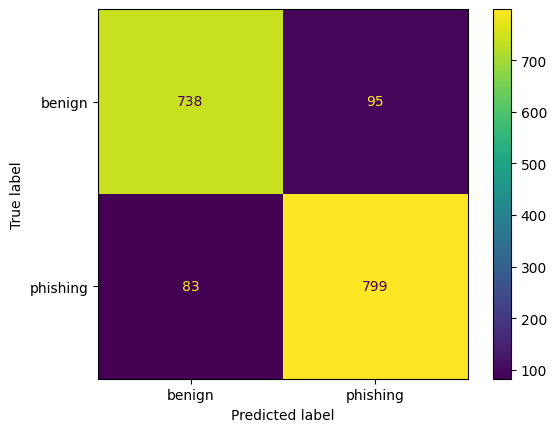

In [17]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["benign", "phishing"])                            
matrix.plot()

In [18]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)

In [19]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.8962099125364431, 'Precision': 0.8937360178970917, 'Recall': 0.9058956916099773, 'F1_score': 0.8997747747747747}


In [3]:
df = pd.read_csv("../Metrics of Dataset #2.csv")

In [21]:
metrics = pd.DataFrame({"Model": "MLP", "Accuracy": [Accuracy], "Precision":[Precision], "Recall": [Recall], "F1_score": [F1_score]})

In [25]:
df = pd.concat([df, metrics], ignore_index=True)

In [ ]:
df.head()

,Model,Accuracy,Precision,Recall,F1_score
0,LinearSVC,0.869388,0.859956,0.891156,0.875278
1,Random Forest,0.900875,0.913953,0.891156,0.902411
2,XGBoost,0.895044,0.892617,0.904762,0.898649
3,MLP,0.896210,0.893736,0.905896,0.899775


In [27]:
df.to_csv("../Metrics of Dataset #2.csv", index=False)

In [28]:
dump(mlp, 'MLP #2.joblib')

['MLP #2.joblib']